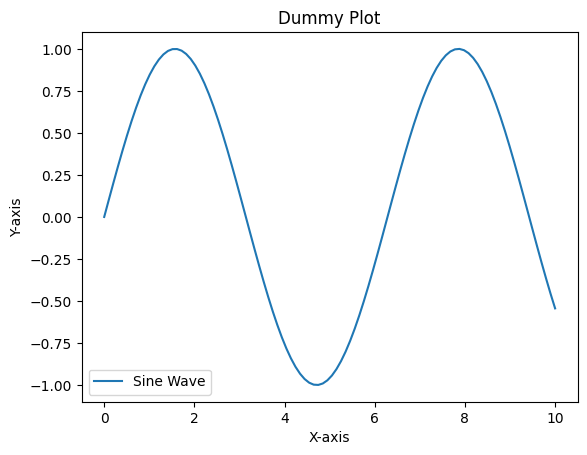

The sum of x is: 499.99999999999994


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot the data
plt.plot(x, y, label='Sine Wave')
plt.title('Dummy Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

# Perform a basic calculation
result = sum(x)
print(f"The sum of x is: {result}")